In [1]:
from astropy.coordinates import EarthLocation, Angle
from astropy.time import Time
from astropy import units
import numpy as np
import matplotlib.pyplot as plt
import pyuvdata.utils as uvutils

In [2]:
 hera_loc = EarthLocation.from_geodetic(
    lat=-30.72152612068957,
    lon=21.428303826863015,
    height=1051.6900000218302
)

In [3]:
start_time = 2458101.5435486115
Ntimes = 28728
integration_time = 1.0

In [4]:
daysperhour = 1 / 24.
hourspersec = 1 / 60. ** 2
dayspersec = daysperhour * hourspersec
inttime_days = integration_time * dayspersec
duration = inttime_days * Ntimes
end_time = start_time + duration - inttime_days
times = np.linspace(start_time, end_time + inttime_days, Ntimes,endpoint=False)

In [5]:
uv_lsts_erfa = uvutils.get_lst_for_time(
    times, latitude=hera_loc.lat.deg, longitude=hera_loc.lon.deg, altitude=hera_loc.height.value, astrometry_library=None, frame="itrs"
)
uv_lsts_astropy = uvutils.get_lst_for_time(
    times, latitude=hera_loc.lat.deg, longitude=hera_loc.lon.deg, altitude=hera_loc.height.value, astrometry_library="astropy", frame="itrs"
)
uv_lsts_novas = uvutils.get_lst_for_time(
    times, latitude=hera_loc.lat.deg, longitude=hera_loc.lon.deg, altitude=hera_loc.height.value, astrometry_library="novas", frame="itrs"
)

In [6]:
erfa_astropy_diff = uv_lsts_erfa - uv_lsts_astropy
novas_astropy_diff = uv_lsts_novas - uv_lsts_astropy
print("Max erfa error in milliarcseconds", (np.max(np.abs(erfa_astropy_diff)) * units.rad).to_value("mas"))
print("Max novas error in milliarcseconds", (np.max(np.abs(novas_astropy_diff)) * units.rad).to_value("mas"))

Max erfa error in milliarcseconds 0.3110593165135049
Max novas error in milliarcseconds 1.0870605028499307


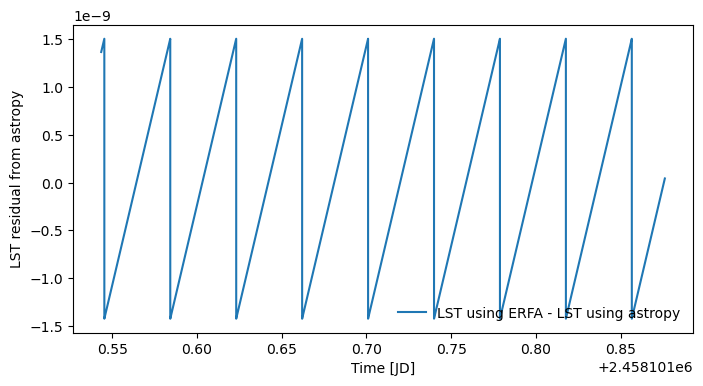

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(times, erfa_astropy_diff, label = 'LST using ERFA - LST using astropy')
# plt.plot(times, novas_astropy_diff, label = 'LST using novas - LST using astropy')
plt.ylabel('LST residual from astropy')
plt.xlabel('Time [JD]')
plt.legend(frameon=False)
plt.show()

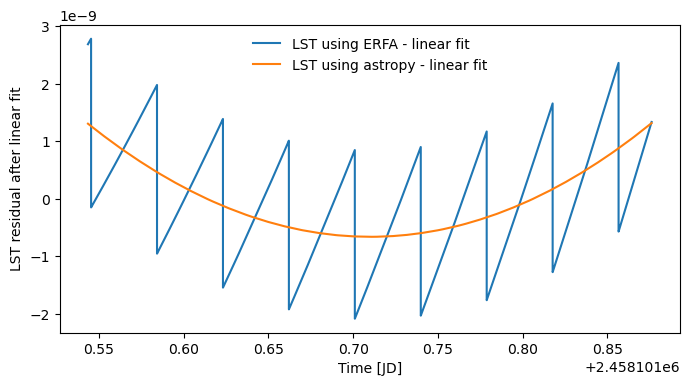

In [15]:
dtimes = times - int(times[0])
erfa_poly = np.poly1d(np.polyfit(dtimes, uv_lsts_erfa, 1))
astropy_poly = np.poly1d(np.polyfit(dtimes, uv_lsts_astropy, 1))
novas_poly = np.poly1d(np.polyfit(dtimes, uv_lsts_novas, 1))

plt.figure(figsize=(8, 4))
plt.plot(times, uv_lsts_erfa-erfa_poly(dtimes), label = "LST using ERFA - linear fit")
plt.plot(times, uv_lsts_astropy-astropy_poly(dtimes), label = "LST using astropy - linear fit")
# plt.plot(times, uv_lsts_novas-novas_poly(dtimes), label = "LST using novas - linear fit")
plt.ylabel('LST residual after linear fit')
plt.xlabel('Time [JD]')
plt.legend(frameon=False)
plt.show()

In [9]:
print(np.max(np.abs(uv_lsts_erfa-erfa_poly(dtimes))))
print(np.max(np.abs(uv_lsts_astropy-astropy_poly(dtimes))))
print(np.max(np.abs(uv_lsts_novas-novas_poly(dtimes))))

2.786470165716537e-09
1.319824249890189e-09
2.7864772711438945e-09


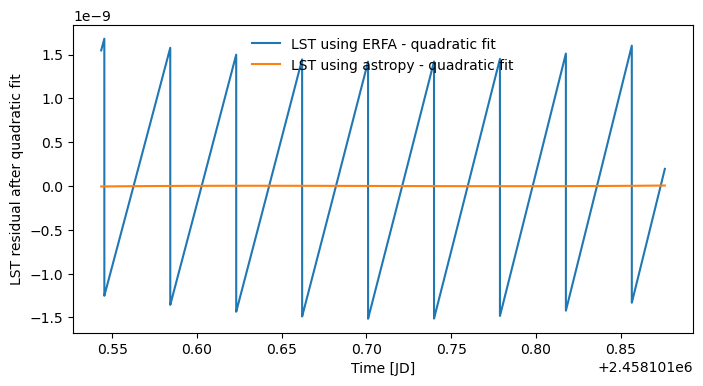

In [16]:
erfa_poly2 = np.poly1d(np.polyfit(dtimes, uv_lsts_erfa, 2))
astropy_poly2 = np.poly1d(np.polyfit(dtimes, uv_lsts_astropy, 2))
novas_poly2 = np.poly1d(np.polyfit(dtimes, uv_lsts_novas, 2))

plt.figure(figsize=(8, 4))
plt.plot(times, uv_lsts_erfa-erfa_poly2(dtimes), label = "LST using ERFA - quadratic fit")
plt.plot(times, uv_lsts_astropy-astropy_poly2(dtimes), label = "LST using astropy - quadratic fit")
# plt.plot(times, uv_lsts_novas-novas_poly2(dtimes), label = "LST using novas - quadratic fit")
plt.ylabel('LST residual after quadratic fit')
plt.xlabel('Time [JD]')
plt.legend(frameon=False)
plt.show()

In [11]:
print("Max quadratic residual, erfa:", np.max(np.abs(uv_lsts_erfa-erfa_poly2(dtimes))))
print("Max quadratic residual, astropy:", np.max(np.abs(uv_lsts_astropy-astropy_poly2(dtimes))))
print("Max quadratic residual, erfa:", np.max(np.abs(uv_lsts_novas-novas_poly2(dtimes))))

Max quadratic residual, erfa: 1.6803656244235299e-09
Max quadratic residual, astropy: 5.539568803669681e-12
Max quadratic residual, erfa: 1.680371397583258e-09


In [12]:
times_obj = Time(times, format="jd", scale="utc", location=hera_loc)

In [13]:
times_obj.jd1

array([2458102., 2458102., 2458102., ..., 2458102., 2458102., 2458102.])

In [14]:
times_obj.jd2

array([-0.45645139, -0.45643981, -0.45642824, ..., -0.12398611,
       -0.12397454, -0.12396296])